#LSTM Based Stock Market Prediction



---

Here, we are trying to implement general LSTM model for any stock prediction which is listed on yahoo finance. This whole project devided in two different techniques. First we will implement multiple stock data together and will try to get minimal optimal solution, which gives the result of stock about which stock is giving high return with low risk of loss. Second, we will implement data for one stock and try to get less rmse value for future prediction with use of LSTM model.



#Import Required Python Libraries

In [230]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam

# Scale the data
from sklearn.preprocessing import MinMaxScaler

#Load Stock Data From Yahoo Finance For Given User Input

In [231]:
print("Enter The Stock Short Name:")
stock1 = input()
stock2 = input()
stock3 = input()
stock4 = input()
# Get the stock quote
df1 = DataReader(stock1, data_source='yahoo', start='2012-01-01', end=datetime.now())
df2 = DataReader(stock2, data_source='yahoo', start='2012-01-01', end=datetime.now())
df3 = DataReader(stock3, data_source='yahoo', start='2012-01-01', end=datetime.now())
df4 = DataReader(stock4, data_source='yahoo', start='2012-01-01', end=datetime.now())


print("\nEnter The Company Name:")
name1 = input()
name2 = input()
name3 = input()
name4 = input()

Enter The Stock Short Name:
FB
EBAY
FDX
TSLA

Enter The Company Name:
FACEBOOK
EBAY
FEDEX
TESLA


#Merge Data Set of All Different Stocks

In [232]:
company_list = [df1,df2,df3,df4]
company_name = [name1,name2,name3,name4]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-04-12,704.799988,682.090027,685.700012,701.979980,29135700.0,701.979980,TESLA
2021-04-13,763.000000,710.659973,712.700012,762.320007,44652800.0,762.320007,TESLA
2021-04-14,780.789978,728.030029,770.700012,732.229980,49017400.0,732.229980,TESLA
2021-04-15,743.690002,721.309998,743.099976,738.849976,27848900.0,738.849976,TESLA
2021-04-16,749.409973,724.599976,728.650024,739.780029,27924000.0,739.780029,TESLA
2021-04-19,725.400024,691.799988,719.599976,714.630005,39686200.0,714.630005,TESLA
2021-04-20,737.250000,710.690002,717.419983,718.989990,35609000.0,718.989990,TESLA
2021-04-21,744.840027,698.000000,704.770020,744.119995,31215500.0,744.119995,TESLA
2021-04-22,753.770020,718.039978,741.500000,719.690002,35590300.0,719.690002,TESLA


#Data Visualisation

In [233]:
# Summary Stats
df1.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2247.000000,2247.000000,2247.000000,2247.000000,2.247000e+03,2247.000000
mean,130.891313,127.793040,129.357726,129.390552,3.171527e+07,129.390552
std,73.431484,71.641903,72.518030,72.560784,2.820479e+07,72.560784
min,18.270000,17.549999,18.080000,17.730000,5.913100e+06,17.730000
25%,74.364998,72.830002,73.755001,73.594997,1.614740e+07,73.594997
50%,126.599998,124.550003,125.339996,125.260002,2.306040e+07,125.260002
75%,181.529999,178.180000,179.924995,180.040001,3.692205e+07,180.040001
max,315.880005,310.329987,314.850006,313.089996,5.735764e+08,313.089996


In [234]:
# General info
df1.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2247 entries, 2012-05-18 to 2021-04-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          2247 non-null   float64
 1   Low           2247 non-null   float64
 2   Open          2247 non-null   float64
 3   Close         2247 non-null   float64
 4   Volume        2247 non-null   int64  
 5   Adj Close     2247 non-null   float64
 6   company_name  2247 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 140.4+ KB


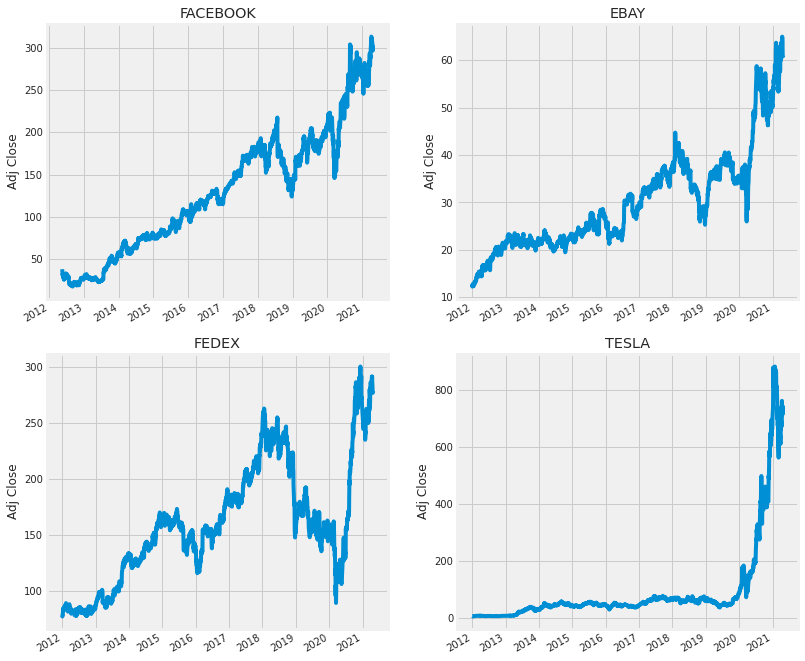

In [235]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}")

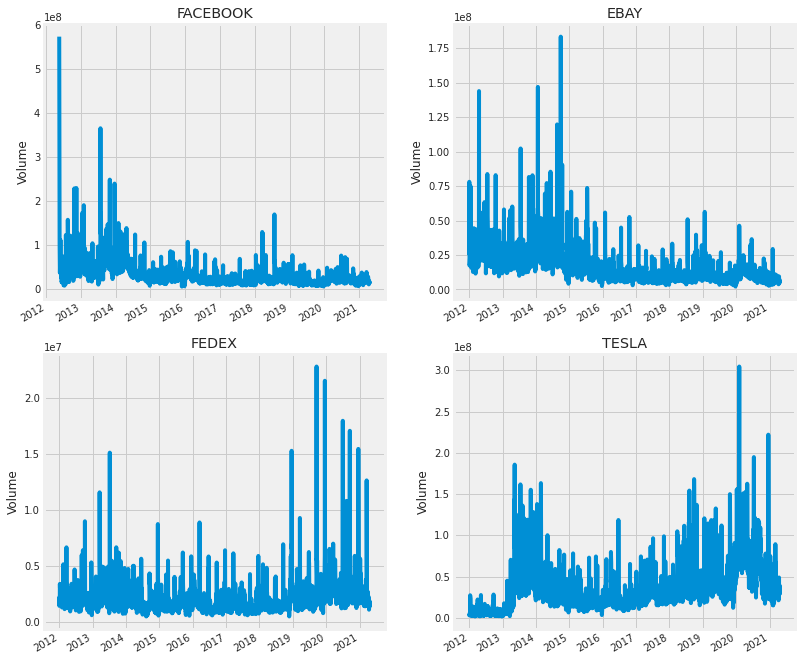

In [236]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}")

In [237]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [238]:
print(df1.columns)


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


company_name
EBAY        [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
FACEBOOK    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
FEDEX       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
TESLA       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
dtype: object

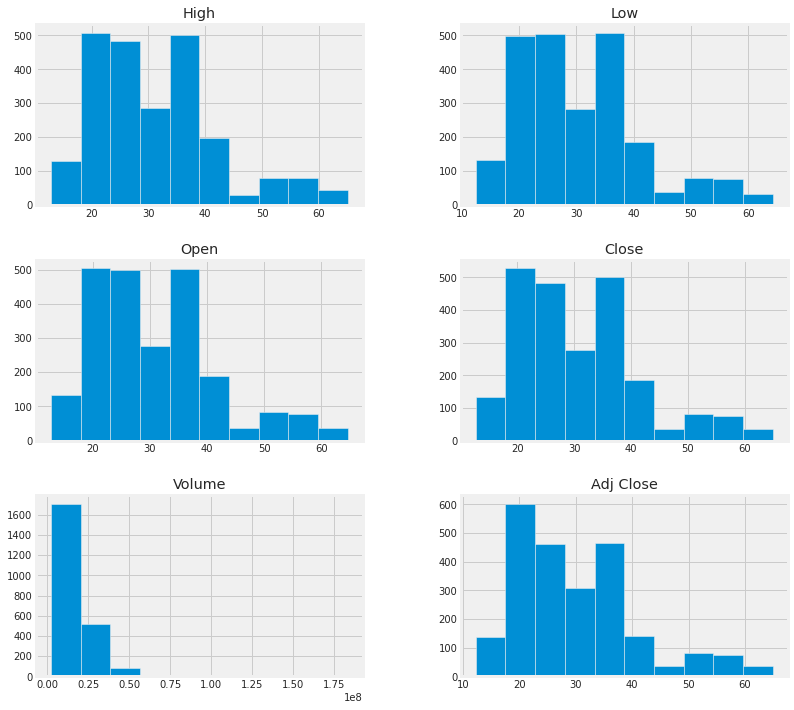

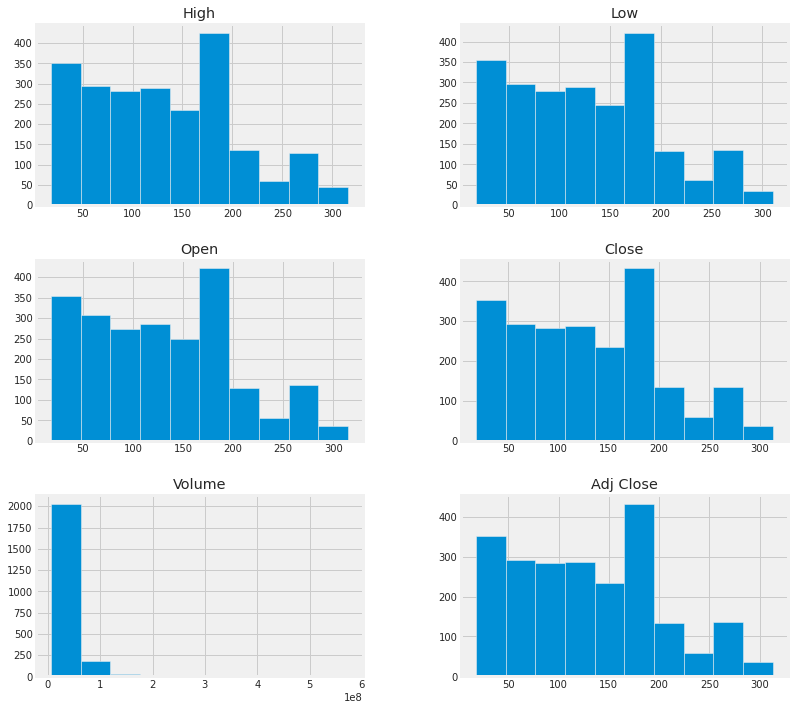

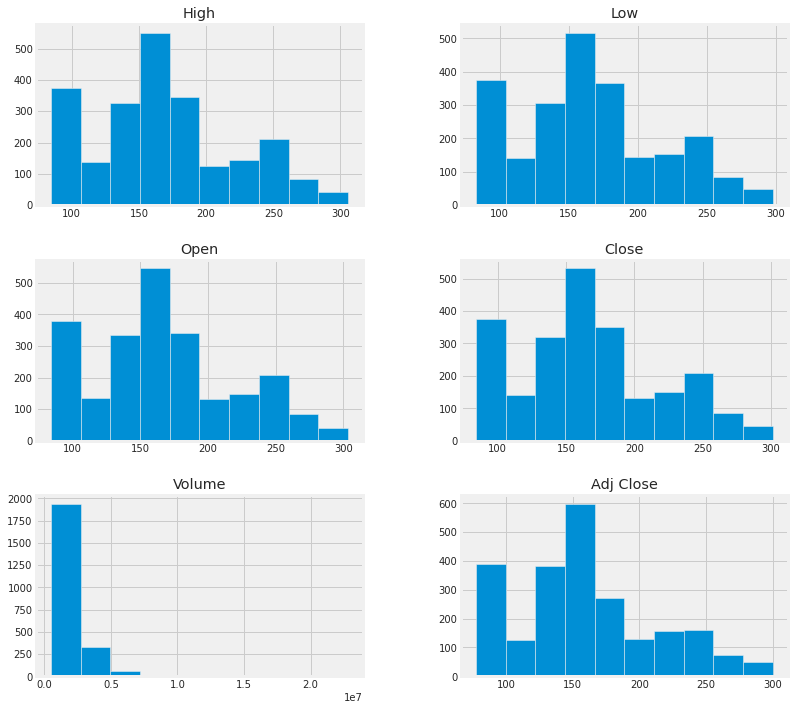

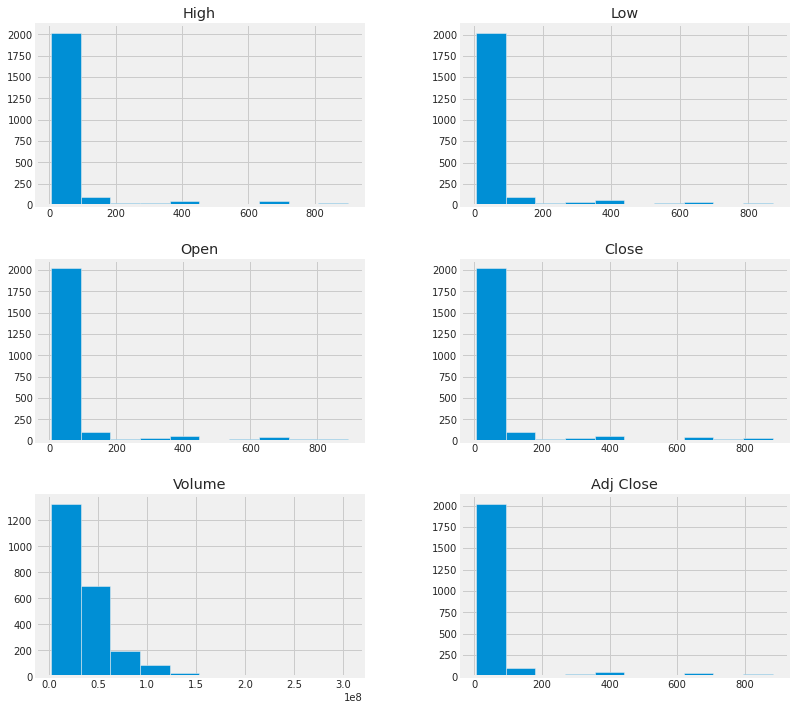

In [239]:
df.groupby("company_name").hist(figsize=(12, 12))

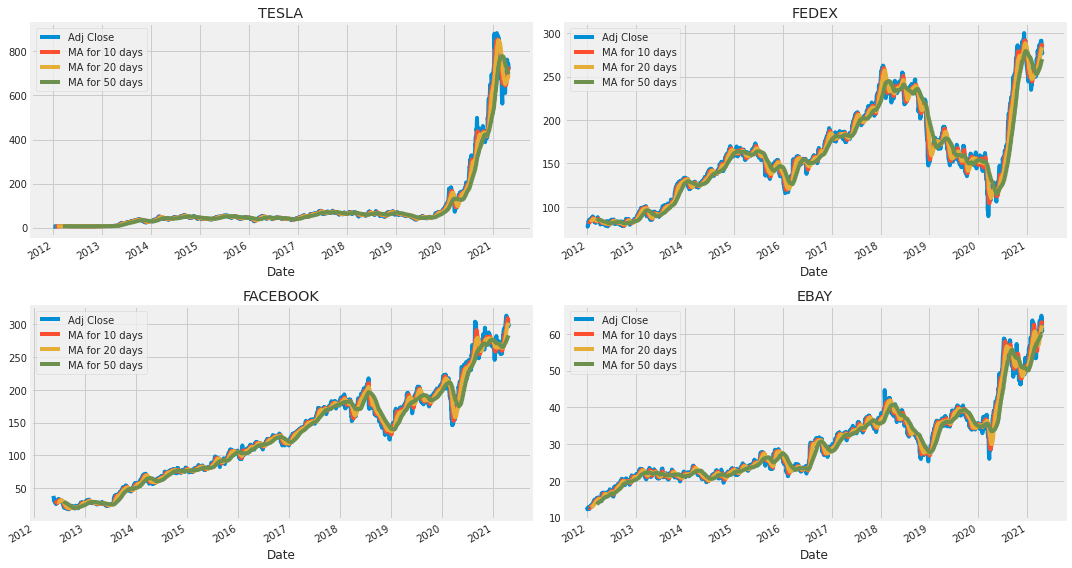

In [240]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

df1[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title(name1)

df2[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title(name2)

df3[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title(name3)

df4[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title(name4)

fig.tight_layout()

Daily Avg. Return of FACEBOOK : 0.0011914122103077742 USD
Daily Avg. Return of EBAY : 0.0008243406999603682 USD
Daily Avg. Return of FEDEX : 0.0007004155601047395 USD
Daily Avg. Return of TESLA : 0.0027057133113238207 USD


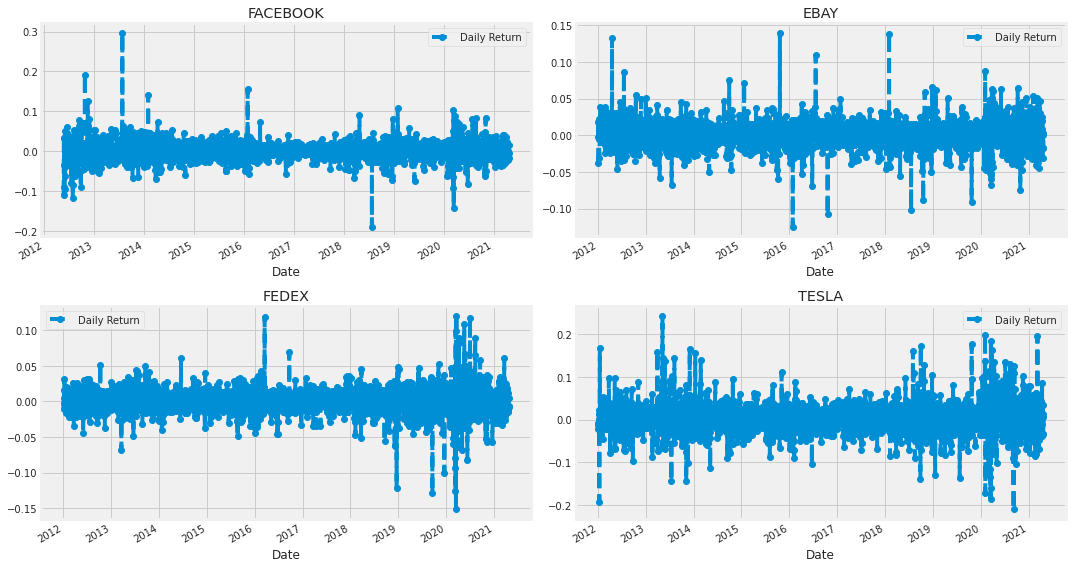

In [241]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

df1['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title(name1)

df2['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title(name2)

df3['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title(name3)

df4['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title(name4)

fig.tight_layout()

print('Daily Avg. Return of',name1,':',df1['Daily Return'].mean(),'USD')
print('Daily Avg. Return of',name2,':',df2['Daily Return'].mean(),'USD')
print('Daily Avg. Return of',name3,':',df3['Daily Return'].mean(),'USD')
print('Daily Avg. Return of',name4,':',df4['Daily Return'].mean(),'USD')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

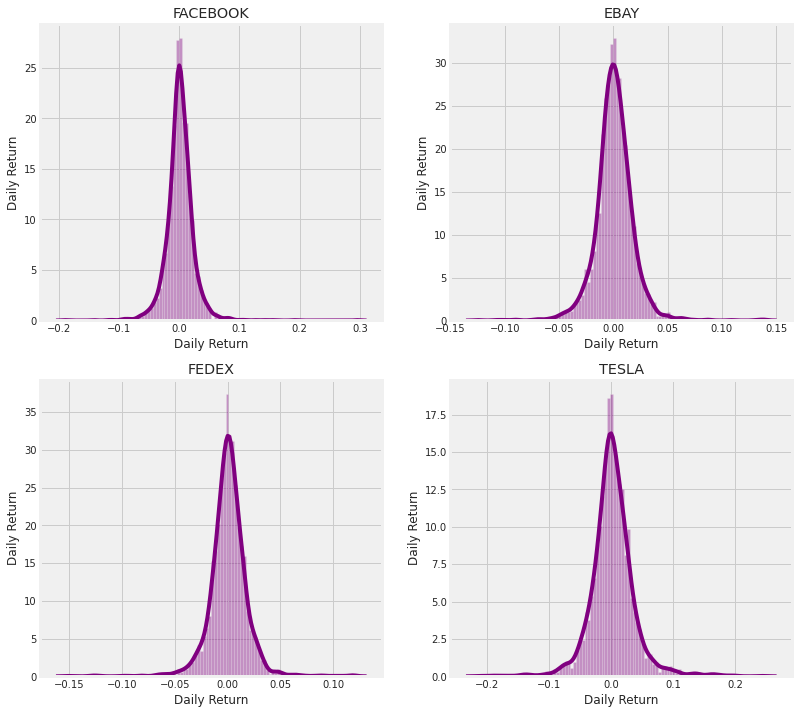

In [242]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

In [243]:
# Grab all the closing prices for the tech stock list into one DataFrame
close = df1
close[name1]=df1['Adj Close']
close[name2]=df2['Adj Close']
close[name3]=df3['Adj Close']
close[name4]=df4['Adj Close']
close = close[[name1,name2,name3,name4]]
# Let's take a quick look
close.head() 

,FACEBOOK,EBAY,FEDEX,TESLA
Date,,,,
2012-05-18,38.230000,15.629610,78.345116,5.512
2012-05-21,34.029999,16.098175,79.846268,5.754
2012-05-22,31.000000,15.980014,79.984398,6.160
2012-05-23,32.000000,16.167439,81.725044,6.204
2012-05-24,33.029999,16.159290,82.903816,6.056


In [244]:
# Make a new tech returns DataFrame
tech_rets = close.pct_change()
tech_rets.head()


,FACEBOOK,EBAY,FEDEX,TESLA
Date,,,,
2012-05-18,NaN,NaN,NaN,NaN
2012-05-21,-0.109861,0.029979,0.019161,0.043904
2012-05-22,-0.089039,-0.007340,0.001730,0.070560
2012-05-23,0.032258,0.011729,0.021762,0.007143
2012-05-24,0.032187,-0.000504,0.014424,-0.023856


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


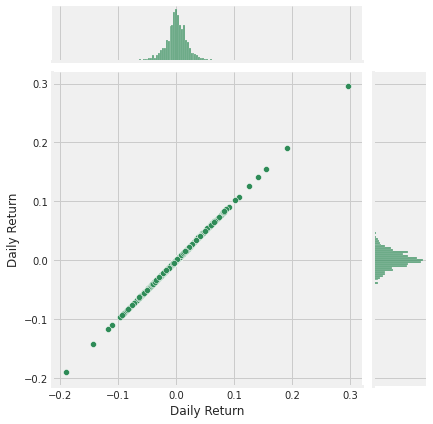

In [245]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(df1['Daily Return'], df1['Daily Return'], tech_rets, kind='scatter', color='seagreen')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


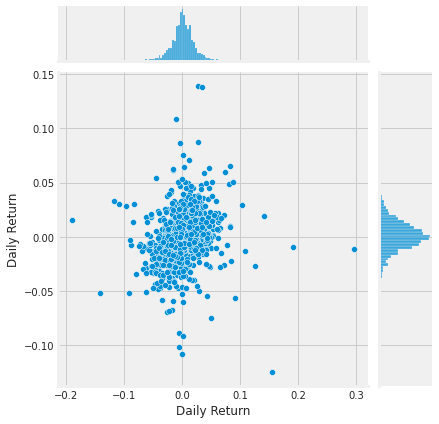

In [246]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(df1['Daily Return'], df2['Daily Return'], tech_rets, kind='scatter')


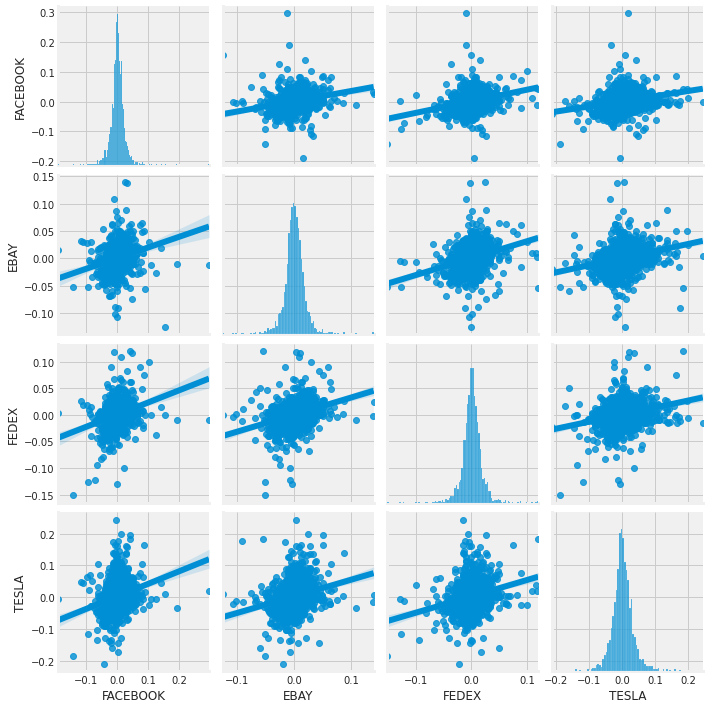

In [247]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')


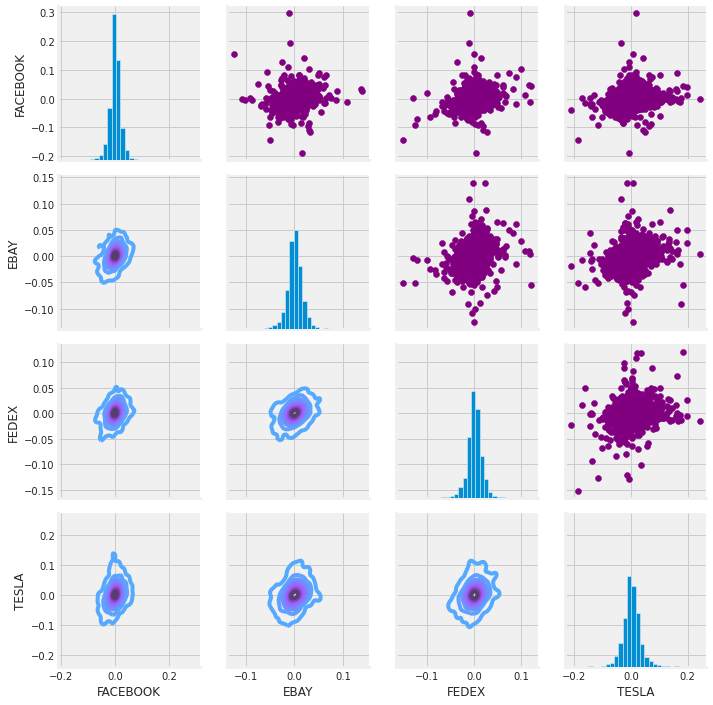

In [248]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

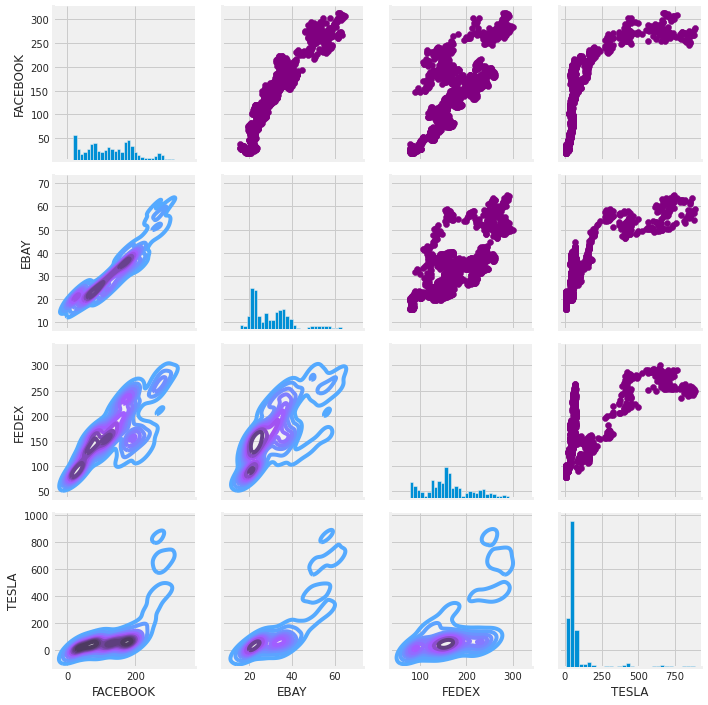

In [249]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(close)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


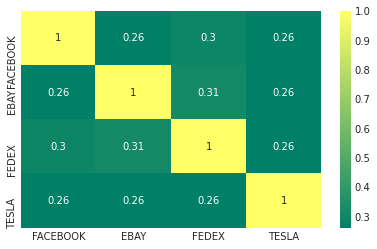

In [250]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')


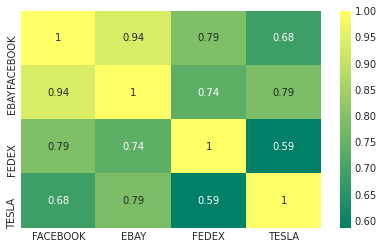

In [251]:
sns.heatmap(close.corr(), annot=True, cmap='summer')


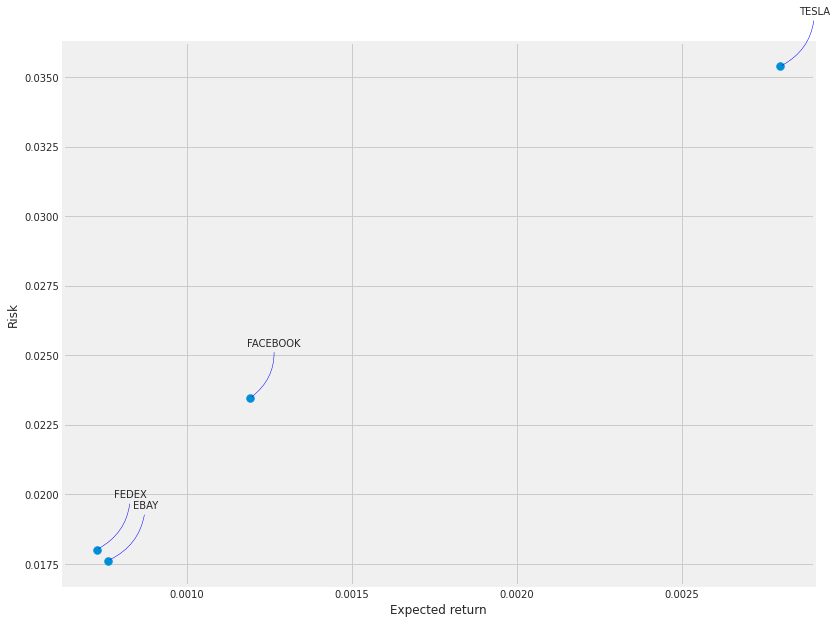

In [252]:
# Let's start by defining a new DataFrame as a cleaned version of the original tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
    

#LSTM to Predict Stock Price Based On Previous Data

#Read Data From Yahoo Finance For Particular User Input Stock

In [282]:
stock = input()
# Get the stock quote
df = DataReader(stock, data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df


FDX


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,85.910004,84.480003,85.470001,85.169998,2210000.0,78.323631
2012-01-04,85.169998,84.209999,84.730003,84.959999,1443400.0,78.130493
2012-01-05,84.489998,82.790001,84.419998,84.089996,2218600.0,77.330444
2012-01-06,86.059998,84.529999,84.559998,85.489998,2156700.0,78.617912
2012-01-09,85.980003,85.239998,85.839996,85.849998,1659600.0,78.948967
...,...,...,...,...,...,...
2021-04-19,286.670013,282.089996,286.059998,283.250000,1677000.0,283.250000
2021-04-20,283.799988,277.339996,282.420013,280.339996,1425300.0,280.339996
2021-04-21,281.070007,277.089996,279.049988,278.260010,1861400.0,278.260010


#Visualisation

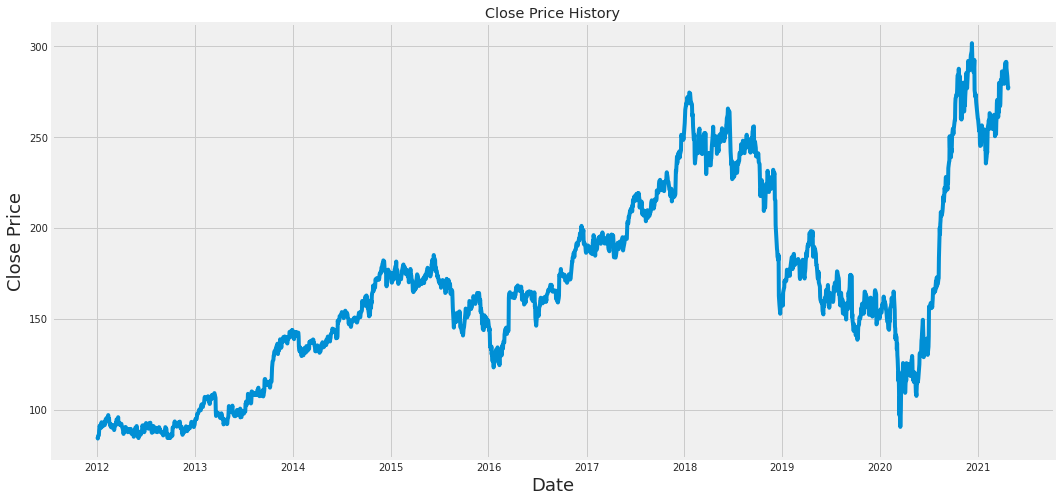

In [283]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()


#Splitting Data in Training Data

In [284]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))

training_data_len


2108

#Preprocessing Data to Fit Into The LSTM Model

In [285]:


scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



In [286]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.00496872, 0.00400259, 0.        , 0.00644093, 0.00809718,
       0.02033495, 0.02608578, 0.03266473, 0.02889219, 0.02709793,
       0.03243468, 0.04117595, 0.03441297, 0.03206662, 0.03082446,
       0.03910563, 0.03979573, 0.04076187, 0.03712738, 0.03404491,
       0.0396117 , 0.04002578, 0.04807694, 0.05134341, 0.04890506,
       0.04780091, 0.04927312, 0.0514354 , 0.05930257, 0.05272362,
       0.04628269, 0.05019324, 0.0409459 , 0.03183661, 0.03064043,
       0.03625324, 0.02829408, 0.03344683, 0.03169859, 0.02714391,
       0.03234268, 0.03077844, 0.02916822, 0.0214391 , 0.02608578,
       0.03174458, 0.03542512, 0.03330882, 0.04043982, 0.03731137,
       0.04839899, 0.04715679, 0.04968717, 0.048537  , 0.05396578,
       0.03869159, 0.03813949, 0.03993375, 0.0359312 , 0.03404491])]
[0.03519507254031723]

[array([0.00496872, 0.00400259, 0.        , 0.00644093, 0.00809718,
       0.02033495, 0.02608578, 0.03266473, 0.02889219, 0.02709793,
       0.03243468, 0.04117595, 0.03

#Creating LSTM Model To Fit Training Data

In [317]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
#model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(units=64, return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(units=64, return_sequences=True))
#model.add(Dense(32,activation='relu'))
#model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
#model.add(Dense(32,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=1)


32/32 [==============================] - 7s 125ms/step - loss: 0.0389


#Fitting Testing Data in Model and Getting RMSE value 

In [318]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
prediction = model.predict(x_test)
predictions = scaler.inverse_transform(prediction)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


12.648882826135836

#Plotting Prediction Value with training and validation graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


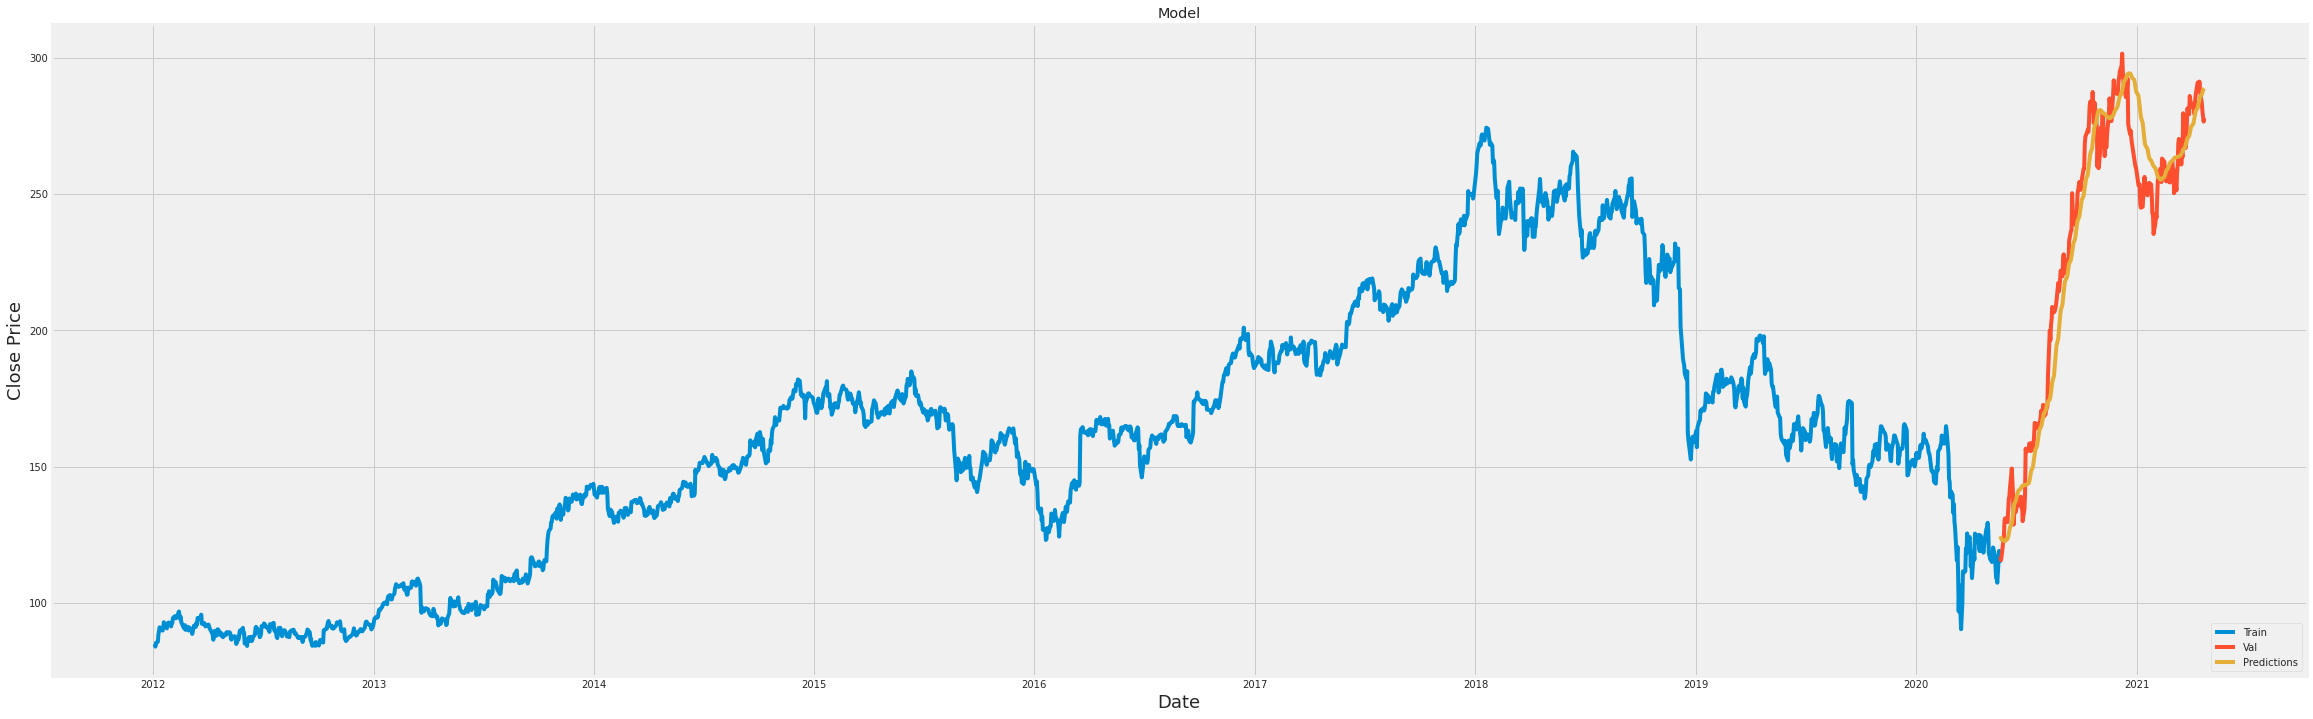

In [319]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(36,12))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [320]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-05-20,117.010002,124.581078
2020-05-21,115.769997,123.946289
2020-05-22,117.000000,123.408829
2020-05-26,124.809998,122.980782
2020-05-27,130.429993,122.734596
...,...,...
2021-04-19,283.250000,286.497406
2021-04-20,280.339996,287.332825
2021-04-21,278.260010,288.004089


#Plotting Close Value of Validation Data and Prediction

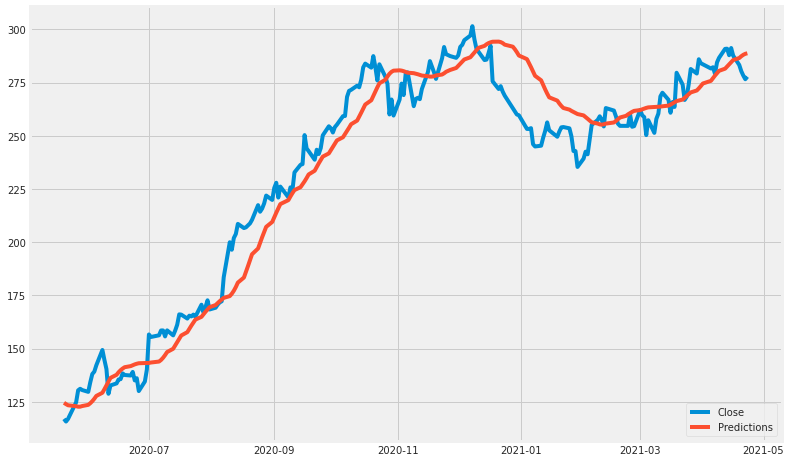

In [321]:
plt.figure(figsize=(12,8))
plt.plot(valid)
plt.legend(['Close', 'Predictions'], loc='lower right',)